In [1]:
import numpy as np
from numpy.matlib import repmat
import matplotlib.pyplot as plt
from load_data import load_skl_data, load_circular_data, load_two_spirals, load_random_classification_dataset
from vicinal import mixup
from utilities import visclassifier

In [2]:
train_data, train_labels, val_data, val_labels, test_data, test_labels = load_two_spirals(300)

In [3]:
from sklearn.neural_network import MLPClassifier

In [4]:
nn = MLPClassifier(hidden_layer_sizes=(1000, 100), max_iter=1500, alpha=0.)
nn.fit(train_data, train_labels)
print(np.mean(nn.predict(train_data) == train_labels), np.mean(nn.predict(val_data) == val_labels), np.mean(nn.predict(test_data) == test_labels))

1.0 0.7833333333333333 0.8333333333333334


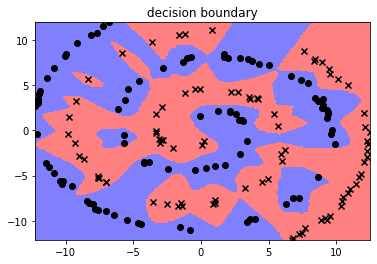

In [5]:
visclassifier(nn.predict, train_data, train_labels, 'decision boundary')

In [6]:
data_perturb, labels_perturb = mixup(train_data, train_labels, 0.2, 0.2, 1, 0, augment=False)

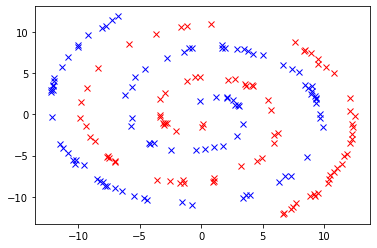

In [7]:
plt.plot(train_data[train_labels == 1, 0], train_data[train_labels == 1, 1], 'rx')
plt.plot(train_data[train_labels == -1, 0], train_data[train_labels == -1, 1], 'bx')
plt.show()

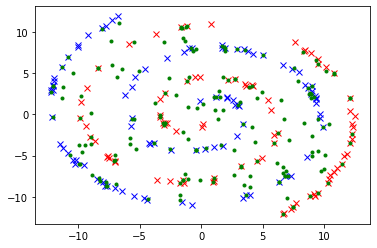

In [8]:
plt.plot(train_data[train_labels == 1, 0], train_data[train_labels == 1, 1], 'rx')
plt.plot(train_data[train_labels == -1, 0], train_data[train_labels == -1, 1], 'bx')
plt.plot(data_perturb[:, 0], data_perturb[:, 1], 'g.')
plt.show()

In [9]:
labels_perturb

array([ 1.        , -1.        ,  1.        , -1.        , -0.03832637,
       -1.        ,  0.99978917,  1.        ,  1.        , -0.80191153,
       -1.        , -1.        , -0.19691592,  1.        , -1.        ,
       -1.        ,  1.        , -1.        , -0.49462847,  0.97251311,
       -0.78339336, -1.        , -0.1382296 ,  1.        ,  0.58912136,
        0.72681458,  0.99990232, -1.        ,  0.96930851, -0.4252805 ,
       -1.        , -1.        , -1.        , -0.98896753,  0.68549492,
       -0.66431397, -1.        , -1.        , -1.        ,  0.99998121,
       -0.99999586,  0.9974217 , -0.96174518, -1.        , -0.88711719,
       -0.99001152, -0.9998867 , -1.        , -0.85642639,  1.        ,
       -0.13362814,  1.        , -0.99994311,  1.        ,  1.        ,
        1.        ,  0.99982252, -1.        ,  0.96746143,  0.3229474 ,
       -1.        , -1.        , -0.93584427,  1.        ,  0.99945693,
       -0.86381977, -1.        ,  0.96051997,  0.39981619,  1.  

In [10]:
labels_perturb = np.sign(labels_perturb)

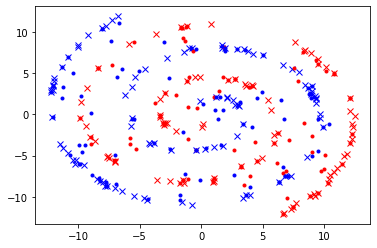

In [11]:
plt.plot(train_data[train_labels == 1, 0], train_data[train_labels == 1, 1], 'rx')
plt.plot(train_data[train_labels == -1, 0], train_data[train_labels == -1, 1], 'bx')
plt.plot(data_perturb[labels_perturb == 1, 0], data_perturb[labels_perturb == 1, 1], 'r.')
plt.plot(data_perturb[labels_perturb == -1, 0], data_perturb[labels_perturb == -1, 1], 'b.')
plt.show()

In [12]:
nn_perturb = MLPClassifier(hidden_layer_sizes=(1000, 100), max_iter=1500, alpha=0.)
nn_perturb.fit(data_perturb, labels_perturb)
print(np.mean(nn_perturb.predict(data_perturb) == labels_perturb), np.mean(nn_perturb.predict(val_data) == val_labels), np.mean(nn_perturb.predict(test_data) == test_labels))

0.9055555555555556 0.6 0.65


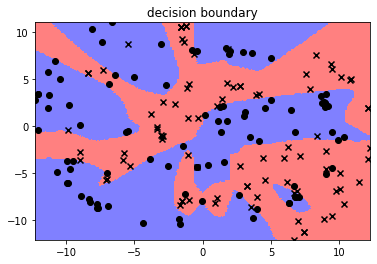

In [13]:
visclassifier(nn_perturb.predict, data_perturb, labels_perturb, 'decision boundary')

In [14]:
data_augment, labels_augment = mixup(train_data, train_labels, 0.2, 0.2, 1, 0, augment=True)

In [15]:
labels_augment

array([ 1.        , -1.        , -1.        ,  1.        ,  1.        ,
       -1.        , -1.        ,  1.        , -0.9424149 , -1.        ,
        1.        , -1.        , -1.        , -0.23024764,  1.        ,
       -1.        ,  1.        ,  1.        ,  1.        ,  0.99985115,
       -0.98615989,  1.        , -0.99968387,  1.        ,  1.        ,
       -0.68577701,  0.97770504,  0.98282423, -1.        , -1.        ,
       -1.        , -1.        ,  1.        ,  0.84289169,  1.        ,
        1.        ,  1.        , -0.99347396,  0.99952944,  1.        ,
       -0.89527381, -0.99924341,  1.        , -1.        , -1.        ,
        1.        ,  1.        , -1.        ,  1.        , -1.        ,
        0.80059448,  1.        , -0.92676596, -1.        , -1.        ,
        1.        ,  0.9611889 , -1.        ,  1.        ,  0.97600567,
        1.        ,  1.        , -0.08372113, -1.        ,  1.        ,
       -1.        , -0.22043071, -1.        ,  0.10874707, -1.  

In [16]:
labels_augment = np.sign(labels_augment)

In [17]:
nn_augment = MLPClassifier(hidden_layer_sizes=(1000, 100), max_iter=1500, alpha=0.)
nn_augment.fit(data_augment, labels_augment)
print(np.mean(nn_augment.predict(data_augment) == labels_augment), np.mean(nn_augment.predict(val_data) == val_labels), np.mean(nn_augment.predict(test_data) == test_labels))

0.9666666666666667 0.7833333333333333 0.8333333333333334


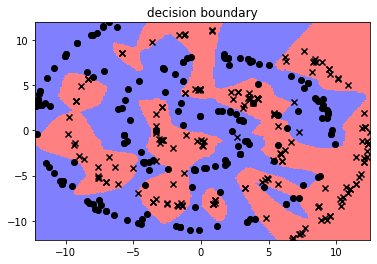

In [18]:
visclassifier(nn_augment.predict, data_augment, labels_augment, 'decision boundary')